✅ Train Accuracy: 0.7407
✅ Test Accuracy: 0.7282


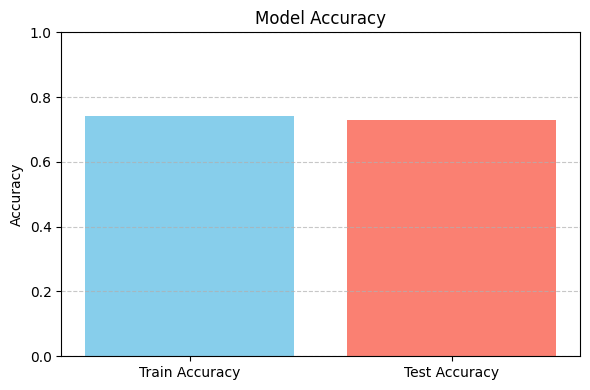

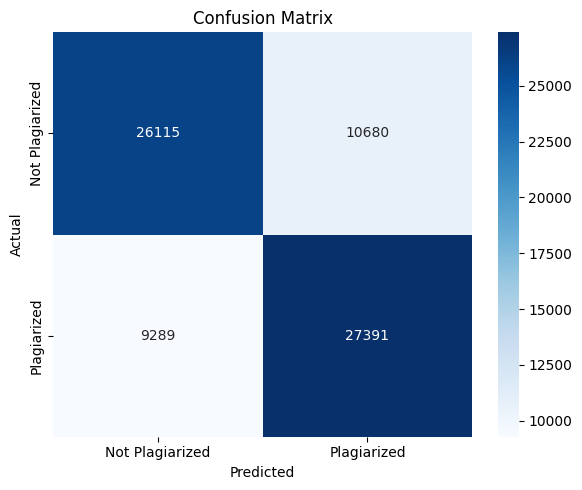


📝 Classification Report:

                 precision    recall  f1-score   support

Not Plagiarized       0.74      0.71      0.72     36795
    Plagiarized       0.72      0.75      0.73     36680

       accuracy                           0.73     73475
      macro avg       0.73      0.73      0.73     73475
   weighted avg       0.73      0.73      0.73     73475



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load the dataset
file_path = r"C:\Users\sagni\Downloads\Paper Plagarism Checker\train_snli.txt"
df = pd.read_csv(file_path, sep="\t", header=None, names=["sentence1", "sentence2", "label"])

# 2. Handle missing values and combine sentences
df["sentence1"] = df["sentence1"].fillna("")
df["sentence2"] = df["sentence2"].fillna("")
df["text"] = df["sentence1"] + " [SEP] " + df["sentence2"]

# 3. Define features and labels
X = df["text"]
y = df["label"]

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 6. Train classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# 7. Evaluate model
train_accuracy = accuracy_score(y_train, model.predict(X_train_vec))
test_accuracy = accuracy_score(y_test, model.predict(X_test_vec))

print("✅ Train Accuracy:", round(train_accuracy, 4))
print("✅ Test Accuracy:", round(test_accuracy, 4))

# 8. Plot accuracy comparison
plt.figure(figsize=(6, 4))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=["skyblue", "salmon"])
plt.ylim(0, 1)
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 9. Plot confusion matrix heatmap
y_pred = model.predict(X_test_vec)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Plagiarized", "Plagiarized"],
            yticklabels=["Not Plagiarized", "Plagiarized"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# 10. Print classification report
print("\n📝 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Not Plagiarized", "Plagiarized"]))
